# PROSPER LOAN DATA ANALYSIS
## by (Subomi Oyewole)

## Dataset Overview

> In this project, Explanatory Data Analysis is carried out on a dataset from Prosper. Prosper is America’s first marketplace lending platform, with over $9 billion dollars in funded loans. This data set contains 113,937 loans with 81 variables on each loan, including loan amount, borrower income, borrower rate (or interest rate), current loan status, borrower credit history, borrower employment status, the latest payment information and much more.



## Investigation Overview


>  The main purpose of this project is to summarize the characteristics of variables that can affect the Borrower APR and to get some ideas about the relationships among multiple variables using data visualizations. In this presentation, some visualizations on loan characterics will be created to study their relationship on Borrower APR and Loan Term.


In [1]:
# import all packages and set plots to be embedded inline
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

%matplotlib inline

# suppress warnings from final output
import warnings
warnings.simplefilter("ignore")

In [2]:
# load cleaned dataset into a pandas dataframe
df = pd.read_csv('cleaned_prosper_loan.csv')

## What is the distribution of Borrower's APR?

The distribution is multi modal with highest peak of the Annual Percentage Rate being around 0.36% 

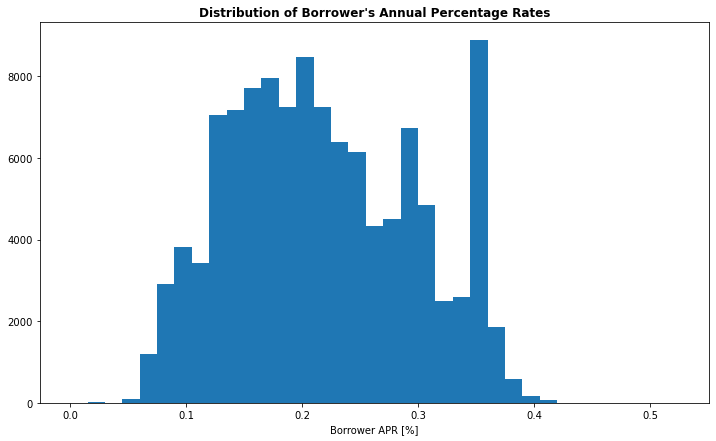

In [3]:
#plotting the distribution of borrower's APR
bins = np.arange(0, df["borrowerapr"].max()+0.015, 0.015)
plt.figure(figsize=[12, 7])
plt.hist(data = df, x = "borrowerapr", bins = bins)
plt.xlabel("Borrower APR [%]")
plt.title("Distribution of Borrower's Annual Percentage Rates", weight=("bold"));

## What is the correlation between Borrower APR, Borrower Rate, Loan Original Amount, Average Credit Score and Prosper Score?

The Borrower APR and Borrower Rate are strongly positively correlated. There is a strong negative correlation between Prosper Score and both Borrower Rate and Borrower APR. The Loan Amount also has a weak negative correlation with both Borrower Rate and Borrower APR and a weak positive correlation with the Average Credit Score and Prosper Score.

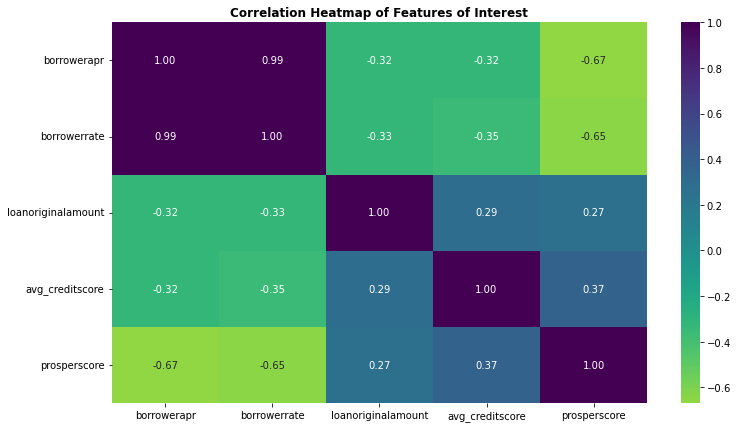

In [4]:
#creating a list of required features
heatzy = ["borrowerapr", "borrowerrate", "loanoriginalamount", "avg_creditscore", "prosperscore"]

#plotting a correlation heatmap
plt.figure(figsize = [12, 7])
sns.heatmap(df[heatzy].corr(), annot = True, fmt = ".2f", cmap = "viridis_r", center=0)
plt.title("Correlation Heatmap of Features of Interest", weight=("bold"));

## What is the yearly trend in loan amount and APR?

The loan amount never got over $30k until the year 2013. There is also a negative correlation between Loan Amount and Borrower APR which has already been established and might be the reason for the rise and fall of the APR each year.

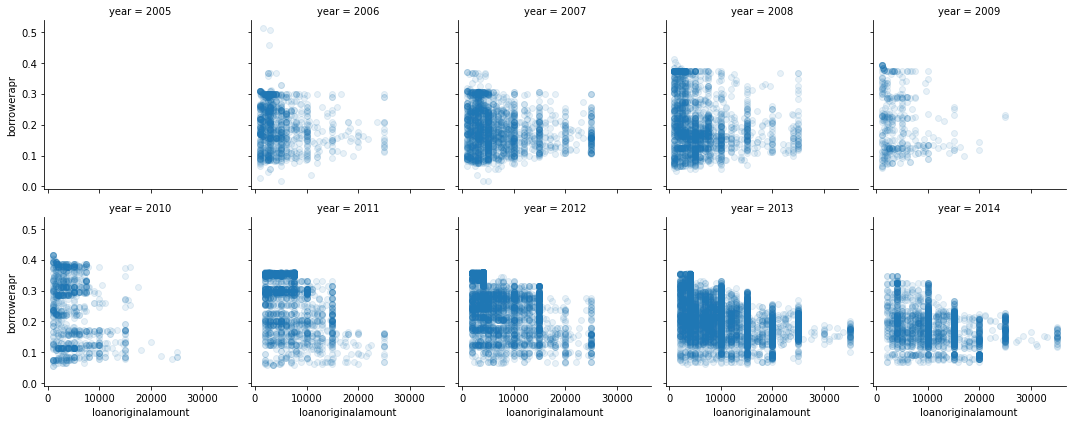

In [5]:
#using a datframe with random samples from main dataframe to construct the facet grid
sample = df.sample(n=20000, replace = False)
g = sns.FacetGrid(data = sample, col_wrap = 5, col = "year", height=3)
g.map(sns.regplot, "loanoriginalamount", "borrowerapr", x_jitter=0.7, scatter_kws={"alpha":1/10}, fit_reg= False);

## How is the Loan amount being distributed by Term?

Borrowers do not take loans higher than \\$25k for 12 months or less. Most loans taken are between \\$1k-5k with 36 months being the most taken loan term for that loan range and also all other loan ranges except for loans higher than \\$30k.

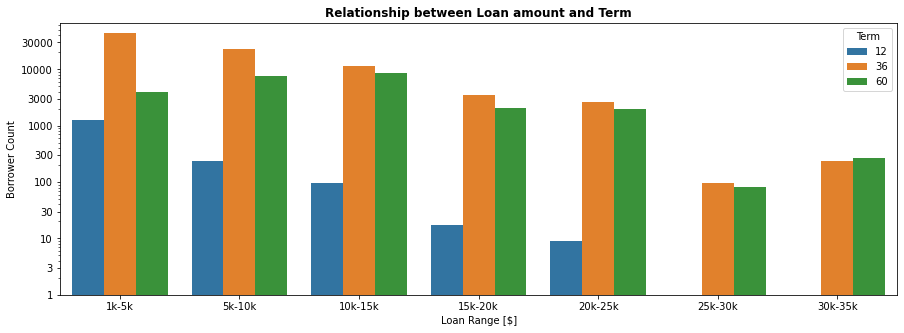

In [6]:
# using the cut function to create a new feature for range of loan amount
df["loan_range"] = pd.cut(df["loanoriginalamount"], bins=[1000,5000,10000,15000,20000,25000,30000,35000],
                          labels=["1k-5k","5k-10k","10k-15k","15k-20k", "20k-25k", "25k-30k", "30k-35k"])

#plotting a clustered bar chart
plt.figure(figsize = [15, 5])
sns.countplot(data=df, x="loan_range", hue="term")
ticks = [1, 3, 10, 30, 100, 300, 1000,3000,10000,30000]
labels = ["{}".format(v) for v in ticks]
plt.yscale("log")
plt.yticks(ticks, labels)
plt.xlabel("Loan Range [$]")
plt.ylabel("Borrower Count")
plt.legend(title="Term")
plt.title("Relationship between Loan amount and Term", weight=("bold"));

## How does the Loan Amount relate with the Term and if the Borrowers are home Owners?

Though over 75% of the borrowers are in the term 36, term 60 still has the highest loan amount requested on average. Across all terms, home owners request for larger loan amounts than Borrowers who are not home owners.

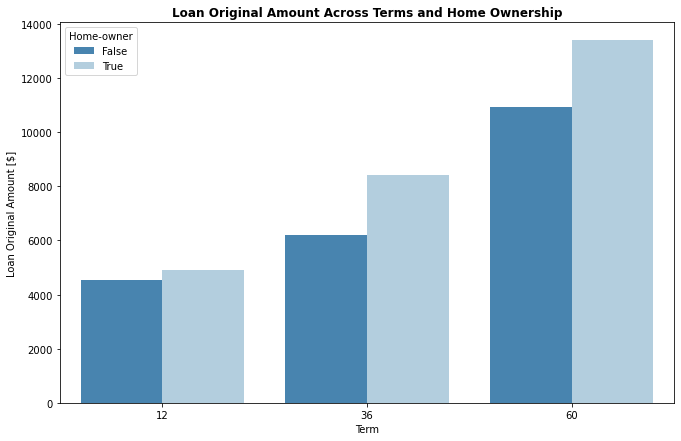

In [7]:
#plotting a barplot
plt.figure(figsize=[11,7])
sns.barplot(data = df, x = "term", y = "loanoriginalamount", hue = "isborrowerhomeowner", palette= 'Blues_r',  ci = None)
plt.xlabel("Term")
plt.ylabel("Loan Original Amount [$]")
plt.legend(title="Home-owner")
plt.title("Loan Original Amount Across Terms and Home Ownership", weight ="bold");

In [9]:
!jupyter nbconvert Part_II_slide.ipynb --to slides --post serve --no-input --no-prompt

[NbConvertApp] Converting notebook Part_II_slide.ipynb to slides
[NbConvertApp] Writing 886591 bytes to Part_II_slide.slides.html
[NbConvertApp] Redirecting reveal.js requests to https://cdnjs.cloudflare.com/ajax/libs/reveal.js/3.5.0
Traceback (most recent call last):
  File "C:\Users\subomi\anaconda3\envs\sesko\Scripts\jupyter-nbconvert-script.py", line 10, in <module>
    sys.exit(main())
  File "C:\Users\subomi\anaconda3\envs\sesko\lib\site-packages\jupyter_core\application.py", line 269, in launch_instance
    return super().launch_instance(argv=argv, **kwargs)
  File "C:\Users\subomi\anaconda3\envs\sesko\lib\site-packages\traitlets\config\application.py", line 846, in launch_instance
    app.start()
  File "C:\Users\subomi\anaconda3\envs\sesko\lib\site-packages\nbconvert\nbconvertapp.py", line 369, in start
    self.convert_notebooks()
  File "C:\Users\subomi\anaconda3\envs\sesko\lib\site-packages\nbconvert\nbconvertapp.py", line 541, in convert_notebooks
    self.convert_single_n